In [7]:
import numpy as np
import pandas as pd
import datetime as dt
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_regression

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

#from sklearn.utils.validation import leverage_scores


In [78]:
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)

In [136]:
counts_only = pd.read_csv(
    open(
        r'C:\Users\cmgas\OneDrive\Business_Practicum\job_loss.csv', 'rb'),
)

In [137]:
counts_only.head(5)

,CountyID,Total Establishments,Labor_Force,Unemployment Rate,Commuter Ratio,Average Weekly Wages,Total Pop,Avg Total Working Adults/House,Self-Employment as % of Workforce,Non-Employer Establishments as % of All Establishments,101,1011,1012,1013,102,1021,1022,1023,1024,1025,1026,1027,1028,1029,11,21,22,23,31-33,42,51,53,54,56,61,62,71,72,81,92,99,% of Total Population in the Labor Force,March Employment Numbers,Jobs_Lost,April_Jobs,Job_Loss_Ratio
0,13001,437,9574.0,3.7,0.761574,1241,18440,1.74,0.128298,0.728545,0.209237,0.046332,0.066083,0.096822,0.208049,0.200624,0.006237,0.016484,0.016632,0.089100,0.121770,0.012029,0.018117,0.002376,0.046332,0.0,0.0,0.066083,0.096822,0.039947,0.006237,0.001188,0.008019,0.008613,0.077072,0.051827,0.000000,0.000000,0.012029,0.018117,0.002376,0.519197,7024,441,6583,0.062785
1,13003,125,4584.0,3.2,0.502479,712,8239,1.81,0.125266,0.818444,0.506499,0.025589,0.006499,0.474411,0.127945,0.063769,0.000000,0.130382,0.010154,0.072299,0.031682,0.005280,0.018684,0.000406,0.000000,0.0,0.0,0.006499,0.474411,0.044679,0.000000,0.000000,0.000000,0.000000,0.103168,0.041430,0.000000,0.000000,0.005280,0.018684,0.000406,0.556378,2230,223,2007,0.100000
2,13005,270,4928.0,3.7,0.775601,700,11201,1.83,0.129900,0.700552,0.328837,0.000000,0.000000,0.201241,0.174804,0.123280,0.000000,0.033990,0.024548,0.070947,0.060426,0.015107,0.002428,0.000000,0.073644,0.0,0.0,0.000000,0.201241,0.000000,0.000000,0.000000,0.015107,0.000000,0.000000,0.007284,0.003507,0.056919,0.015107,0.002428,0.000000,0.439961,3681,-46,3727,-0.012497
3,13007,63,1229.0,4.4,0.373617,714,3132,1.36,0.164512,0.756863,0.205689,0.205689,0.000000,0.000000,0.245077,0.056893,0.000000,0.076586,0.000000,0.054705,0.000000,0.010941,0.010941,0.008753,0.205689,0.0,0.0,0.000000,0.000000,0.028446,0.000000,0.000000,0.000000,0.000000,0.000000,0.054705,0.000000,0.000000,0.010941,0.010941,0.008753,0.392401,439,7,432,0.015945
4,13009,859,18253.0,4.3,0.899468,677,45111,1.95,0.180389,0.788138,0.106117,0.002061,0.022795,0.081262,0.225435,0.080489,0.004121,0.027882,0.080039,0.126980,0.140309,0.021700,0.027431,0.001610,0.000000,0.0,0.0,0.022795,0.081262,0.006504,0.004121,0.007791,0.000000,0.066774,0.058081,0.103348,0.010818,0.129491,0.021700,0.027431,0.001610,0.404624,15720,1485,14235,0.094466


In [138]:
#clean up the dataframe

counts_only = counts_only.drop('Total Establishments', axis = 1) #drop this since it's collinear with population
counts_only = counts_only.drop('Total Pop', axis = 1) #we'll use March employment numbers for this analysis instead of total pop
counts_only = counts_only.drop('March Employment Numbers', axis = 1) #we'll try using labor force first
counts_only = counts_only.drop('% of Total Population in the Labor Force', axis = 1) #drop this since it's collinear with labor force

#make all the % columns percentages so the #s are easier to work with
counts_only['Job_Loss_Ratio'] = counts_only['Job_Loss_Ratio'] * 100
counts_only['Commuter Ratio'] = counts_only['Commuter Ratio'] * 100
counts_only['Self-Employment as % of Workforce'] = counts_only['Self-Employment as % of Workforce'] * 100
counts_only['Non-Employer Establishments as % of All Establishments'] = counts_only['Non-Employer Establishments as % of All Establishments'] * 100
#counts_only['% of Total Population in the Labor Force'] = counts_only['% of Total Population in the Labor Force'] * 100
columns_to_multiply = ['101', '1011', '1012', '1013', '102', '1021', '1022', '1023', '1024', '1025', '1026', '1027', '1028', '1029', '11', '21', '22', '23', '31-33', '42', '51', '53', '54', '56', '61', '62', '71', '72', '81', '92', '99']
counts_only.iloc[:, counts_only.columns.isin(columns_to_multiply)] *= 100
#standardize non-% columns
columns_to_standardize = ['Labor_Force', 'Average Weekly Wages']
scaler = MinMaxScaler(feature_range = (0, 1))
counts_only[columns_to_standardize] = scaler.fit_transform(counts_only[columns_to_standardize])
counts_only.head(5)


,CountyID,Labor_Force,Unemployment Rate,Commuter Ratio,Average Weekly Wages,Avg Total Working Adults/House,Self-Employment as % of Workforce,Non-Employer Establishments as % of All Establishments,101,1011,1012,1013,102,1021,1022,1023,1024,1025,1026,1027,1028,1029,11,21,22,23,31-33,42,51,53,54,56,61,62,71,72,81,92,99,Jobs_Lost,April_Jobs,Job_Loss_Ratio
0,13001,0.015855,3.7,76.157433,0.449903,1.74,12.829811,72.854534,20.923671,4.633205,6.608257,9.682210,20.804871,20.062370,0.623701,1.648352,1.663202,8.910009,12.177012,1.202851,1.811702,0.237600,4.633205,0.0,0.0,6.608257,9.682210,3.994654,0.623701,0.118800,0.801901,0.861301,7.707158,5.182655,0.000000,0.000000,1.202851,1.811702,0.237600,441,6583,6.278474
1,13003,0.007087,3.2,50.247859,0.107951,1.81,12.526649,81.844380,50.649878,2.558895,0.649878,47.441105,12.794476,6.376929,0.000000,13.038180,1.015435,7.229894,3.168156,0.528026,1.868400,0.040617,0.000000,0.0,0.0,0.649878,47.441105,4.467912,0.000000,0.000000,0.000000,0.000000,10.316816,4.142973,0.000000,0.000000,0.528026,1.868400,0.040617,223,2007,10.000000
2,13005,0.007691,3.7,77.560051,0.100194,1.83,12.990029,70.055249,32.883733,0.000000,0.000000,20.124090,17.480442,12.328028,0.000000,3.398975,2.454815,7.094686,6.042622,1.510656,0.242784,0.000000,7.364446,0.0,0.0,0.000000,20.124090,0.000000,0.000000,0.000000,1.510656,0.000000,0.000000,0.728352,0.350688,5.691934,1.510656,0.242784,0.000000,-46,3727,-1.249660
3,13007,0.001191,4.4,37.361702,0.109244,1.36,16.451200,75.686275,20.568928,20.568928,0.000000,0.000000,24.507659,5.689278,0.000000,7.658643,0.000000,5.470460,0.000000,1.094092,1.094092,0.875274,20.568928,0.0,0.0,0.000000,0.000000,2.844639,0.000000,0.000000,0.000000,0.000000,0.000000,5.470460,0.000000,0.000000,1.094092,1.094092,0.875274,7,432,1.594533
4,13009,0.031106,4.3,89.946787,0.085326,1.95,18.038938,78.813766,10.611719,0.206053,2.279459,8.126207,22.543464,8.048938,0.412106,2.788152,8.003863,12.698004,14.030908,2.169994,2.743078,0.160979,0.000000,0.0,0.0,2.279459,8.126207,0.650354,0.412106,0.779137,0.000000,6.677399,5.808113,10.334836,1.081777,12.949131,2.169994,2.743078,0.160979,1485,14235,9.446565


In [133]:
counts_only = counts_only.drop(columns = ["April_Jobs", "Jobs_Lost"])

In [108]:
#check for collinearity before running the model
column_names = list(counts_only.columns)
column_names = column_names[1:-1]


In [109]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(counts_only[column_names].values, i) for i in range(len(column_names))]
vif["features"] = column_names
vif

,VIF Factor,features
0,3.189643,Labor_Force
1,40.137492,Unemployment Rate
2,21.287025,Commuter Ratio
3,6.518123,Average Weekly Wages
4,93.778363,Avg Total Working Adults/House
5,35.569324,Self-Employment as % of Workforce
6,247.742665,Non-Employer Establishments as % of All Establ...
7,26.375846,101
8,7.044172,1011
9,inf,1012


In [110]:
#see which ones are the worst offenders with each other

# Create a correlation matrix of the variables
corr_matrix = counts_only.corr().abs()

# Identify highly correlated variables
highly_correlated = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > 0.8:  # set threshold for correlation strength
            colname = corr_matrix.columns[i]
            highly_correlated.add((colname, corr_matrix.index[j]))

# Print the highly correlated variables
print("Highly correlated variables:")
for pair in highly_correlated:
    print(pair)

Highly correlated variables:
('51', '1022')
('23', '1012')
('81', '1027')
('99', '1029')
('31-33', '1013')
('92', '1028')


In [111]:
#drop one each of those and re-calculate VIF to see what happens
column_names_2 = list(counts_only.columns)
column_names_2 = column_names_2[1:-1]
drop = ['51', '23', '81', '99', '31-33', '92']

for i in drop:
    if i in column_names_2:
        column_names_2.remove(i)

In [112]:
vif2 = pd.DataFrame()
vif2["VIF Factor"] = [variance_inflation_factor(counts_only[column_names_2].values, i) for i in range(len(column_names_2))]
vif2["features"] = column_names_2
vif2

,VIF Factor,features
0,3.189643,Labor_Force
1,40.137492,Unemployment Rate
2,21.287025,Commuter Ratio
3,6.518123,Average Weekly Wages
4,93.778363,Avg Total Working Adults/House
5,35.569324,Self-Employment as % of Workforce
6,247.742665,Non-Employer Establishments as % of All Establ...
7,26.375846,101
8,7.044172,1011
9,3.734712,1012


In [113]:
updated_baseline = counts_only.copy()
updated_baseline = updated_baseline.drop(columns = ['51', '23', '81', '99', '31-33', '92', '102', '101',
    'Non-Employer Establishments as % of All Establishments', 
    'Avg Total Working Adults/House',
    ])

In [114]:
#see which ones are the worst offenders with each other

# Create a correlation matrix of the variables
corr_matrix = updated_baseline.corr().abs()

# Identify highly correlated variables
highly_correlated = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > 0.8:  # set threshold for correlation strength
            colname = corr_matrix.columns[i]
            highly_correlated.add((colname, corr_matrix.index[j]))

# Print the highly correlated variables
print("Highly correlated variables:")
for pair in highly_correlated:
    print(pair)

Highly correlated variables:


In [116]:
#try VIF again after dropping some more
column_names_3 = list(updated_baseline.columns)
column_names_3 = column_names_3[1:-1]

In [117]:
vif3 = pd.DataFrame()
vif3["VIF Factor"] = [variance_inflation_factor(updated_baseline[column_names_3].values, i) for i in range(len(column_names_3))]
vif3["features"] = column_names_3
vif3

,VIF Factor,features
0,3.068222,Labor_Force
1,24.244204,Unemployment Rate
2,18.218839,Commuter Ratio
3,5.699744,Average Weekly Wages
4,30.012154,Self-Employment as % of Workforce
5,6.267624,1011
6,3.044376,1012
7,2.600526,1013
8,10.707052,1021
9,3.549399,1022


In [118]:
#bare minimum model collinearity 
column_names_4 = ["Labor_Force", "Self-Employment as % of Workforce"]
vif4 = pd.DataFrame()
vif4["VIF Factor"] = [variance_inflation_factor(updated_baseline[column_names_4].values, i) for i in range(len(column_names_4))]
vif4["features"] = column_names_4
vif4

,VIF Factor,features
0,1.203899,Labor_Force
1,1.203899,Self-Employment as % of Workforce


In [120]:
#try a few more variables model collinearity 
column_names_5 = ["Labor_Force", "Self-Employment as % of Workforce", "Average Weekly Wages"]
vif5 = pd.DataFrame()
vif5["VIF Factor"] = [variance_inflation_factor(updated_baseline[column_names_5].values, i) for i in range(len(column_names_5))]
vif5["features"] = column_names_5
vif5

,VIF Factor,features
0,1.783890,Labor_Force
1,2.402623,Self-Employment as % of Workforce
2,3.465014,Average Weekly Wages


# Simple Linear Regression

In [46]:
#Simple linear regression using all of the not terribly collinear baseline variables

y = updated_baseline['Job_Loss_Ratio']
x = updated_baseline.iloc[:, 1:-1]

In [47]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x, y, test_size=0.2, random_state=85)

In [62]:
#calculate our baseline model using mean of the target variable

from sklearn.metrics import r2_score

y_mean = np.mean(y1_train)

y_pred = np.full_like(y1_test, y_mean)

r2_baseline = r2_score(y1_test, y_pred)

r2_baseline

-0.006885496515625977

In [48]:
model_simple = LinearRegression().fit(X1_train, y1_train)

In [49]:
score = model_simple.score(X1_train, y1_train)
print(f'R-squared score of the model on the training set: {score:.3f}')

score = model_simple.score(X1_test, y1_test)
print(f'R-squared score of the model on the test set: {score:.3f}')

R-squared score of the model on the training set: 0.499
R-squared score of the model on the test set: -0.465


In [50]:
y1_pred = model_simple.predict(X1_test)
y1_test_array = y1_test.values.reshape(-1, 1)
y1_pred_array = y1_pred.reshape(-1, 1)
comparison = np.hstack((y1_pred_array, y1_test_array))
print(comparison[:10])

[[11.49323017  9.10055605]
 [ 6.85748423  7.69729169]
 [ 6.82246669  4.81440647]
 [12.27583525 11.62939529]
 [13.02837383 23.01455505]
 [17.18634999  9.9756306 ]
 [11.52501056 15.67142857]
 [ 9.29567396 10.9500058 ]
 [ 3.55989313  9.98845266]
 [10.48686419 11.53195366]]


In [54]:
f_values, p_values = f_regression(X1_train, y1_train)
for i, col_name in enumerate(X1_train.columns):
    print(f'{col_name}: p-value={p_values[i]:.4f}')

Average Weekly Wages: p-value=0.0454
Total Pop: p-value=0.0030
1011: p-value=0.0008
1012: p-value=0.1034
1013: p-value=0.2825
1021: p-value=0.2330
1022: p-value=0.0000
1023: p-value=0.2966
1024: p-value=0.0115
1025: p-value=0.5456
1026: p-value=0.0000
1027: p-value=0.0076
1028: p-value=0.0781
1029: p-value=0.0212
11: p-value=0.0003
21: p-value=0.8497
22: p-value=0.5428
42: p-value=0.3402
53: p-value=0.0000
54: p-value=0.0012
56: p-value=0.0003
61: p-value=0.6619
62: p-value=0.0096
71: p-value=0.0000
72: p-value=0.0000


that model is awful and worse than our baseline

In [71]:
import statsmodels.api as sm

#Fit linear model to any dataset
model_simple2 = sm.OLS(y1_train,X1_train)
results = model_simple2.fit()

#create instance of influence
influence = results.get_influence()

#leverage (hat values)
leverage = influence.hat_matrix_diag

#Cook's D values (and p-values) as tuple of arrays
cooks_d = influence.cooks_distance

#standardized residuals
standardized_residuals = influence.resid_studentized_internal

#studentized residuals
studentized_residuals = influence.resid_studentized_external
cooks_d

(array([0.00002409, 0.00002855, 0.0009963 , 0.00387046, 0.01163339,
        0.00038054, 0.0000563 , 0.01040569, 0.00054824, 0.00650776,
        0.01030201, 0.00176934, 0.04027074, 0.0074575 , 0.08566599,
        0.00008982, 0.00000981, 0.00757085, 0.00140159, 0.00400714,
        0.00080647, 0.06827341, 0.0066546 , 0.00029808, 0.00002936,
        0.00389721, 0.00072132, 0.00188423, 0.00020173, 0.00004753,
        0.00036022, 0.00157238, 0.02806825, 0.0001109 , 0.04921988,
        0.00000442, 0.01331664, 0.0025986 , 0.00005944, 0.00124382,
        0.0062389 , 0.00541505, 0.00000215, 0.00033819, 0.00083872,
        0.00110399, 0.00133112, 0.00093202, 0.01508403, 0.00004333,
        0.00991593, 0.00271865, 0.00443946, 0.00484573, 0.0056514 ,
        0.01152049, 0.00502637, 0.00013305, 0.03247499, 0.00040297,
        0.00088477, 0.00534364, 0.07310639, 0.00503315, 0.00051489,
        0.00133408, 0.00124878, 0.01131353, 0.00171446, 0.00167834,
        0.00669345, 0.01012228, 0.0001471 , 0.00

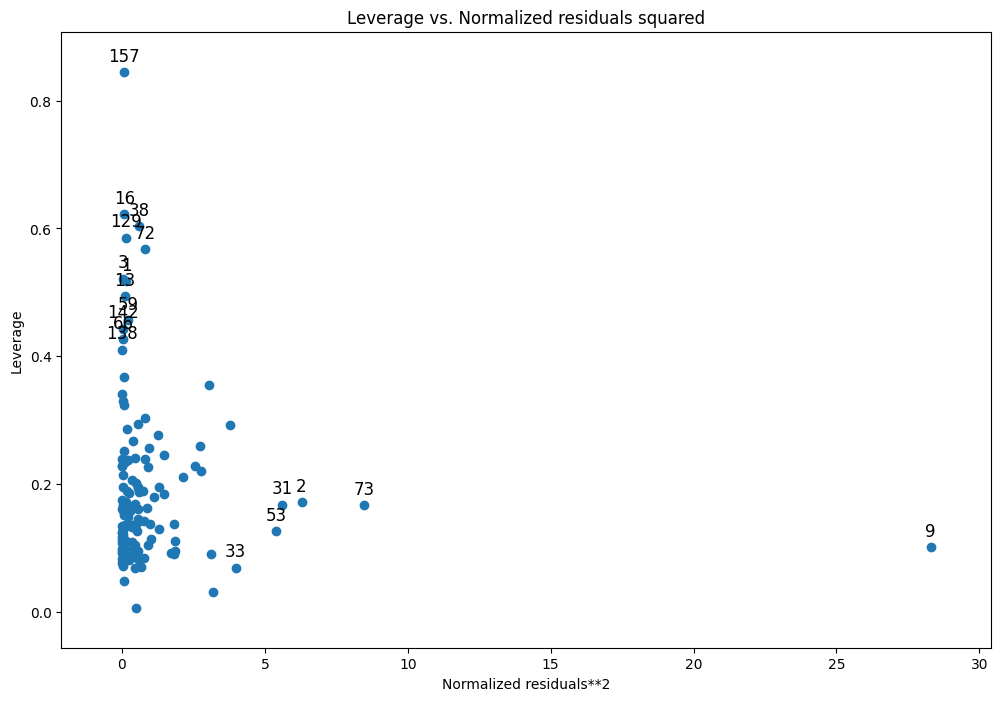

In [72]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_leverage_resid2(results, ax=ax)
plt.show()

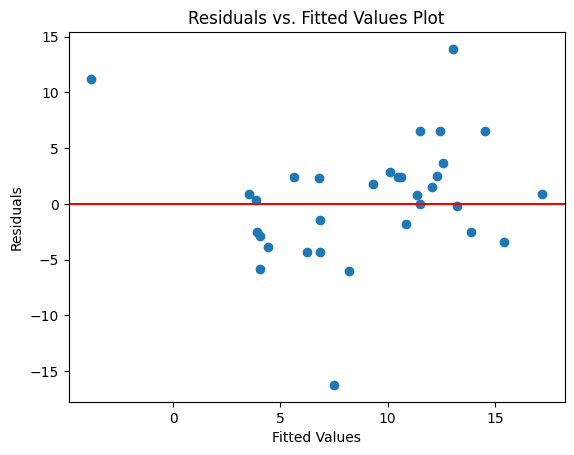

In [73]:
# Create a residuals vs. fitted values plot
fig, ax = plt.subplots()
ax.scatter(y1_pred, residuals)
ax.axhline(y=0, color='r', linestyle='-')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs. Fitted Values Plot')
plt.show()

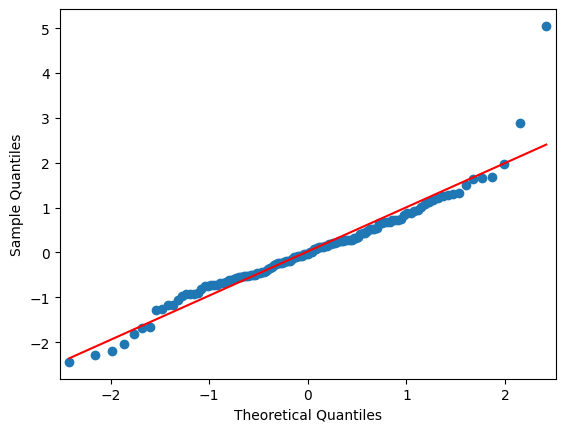

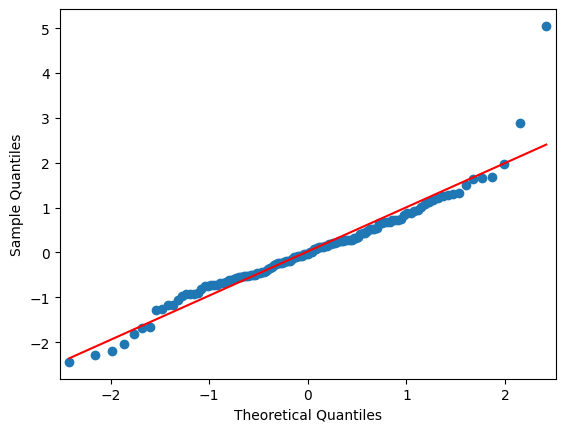

In [75]:
import statsmodels.graphics.gofplots as smg

# Create QQ plot of standardized residuals
smg.qqplot(standardized_residuals, line='s')

Even with the big counties in the same model as the small counties, it doesn't look like we're dealing with any super funny residuals except this issue with nonlinearity at the upper tail in the qq plot

In [155]:
#try a baseline model with just the variables Keith suggested
y2 = updated_baseline['Job_Loss_Ratio']
x2 = updated_baseline[["Labor_Force", "Self-Employment as % of Workforce", "Average Weekly Wages"]]

X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=85)

model_barebones = LinearRegression().fit(X2_train, y2_train)

score = model_barebones.score(X2_train, y2_train)
print(f'R-squared score of the model on the training set: {score:.3f}')

score = model_barebones.score(X2_test, y2_test)
print(f'R-squared score of the model on the test set: {score:.3f}')

R-squared score of the model on the training set: 0.087
R-squared score of the model on the test set: -0.093


In [219]:
take3 = pd.read_csv(
    open(
        r'C:\Users\cmgas\OneDrive\Business_Practicum\job_loss.csv', 'rb'),
)

In [220]:
take3['Large County Indicator'] = take3['Total Pop'].apply(lambda x: 0 if x < 500000 else 1)
take3.head(5)

,CountyID,Total Establishments,Labor_Force,Unemployment Rate,Commuter Ratio,Average Weekly Wages,Total Pop,Avg Total Working Adults/House,Self-Employment as % of Workforce,Non-Employer Establishments as % of All Establishments,101,1011,1012,1013,102,1021,1022,1023,1024,1025,1026,1027,1028,1029,11,21,22,23,31-33,42,51,53,54,56,61,62,71,72,81,92,99,% of Total Population in the Labor Force,March Employment Numbers,Jobs_Lost,April_Jobs,Job_Loss_Ratio,Large County Indicator
0,13001,437,9574.0,3.7,0.761574,1241,18440,1.74,0.128298,0.728545,0.209237,0.046332,0.066083,0.096822,0.208049,0.200624,0.006237,0.016484,0.016632,0.089100,0.121770,0.012029,0.018117,0.002376,0.046332,0.0,0.0,0.066083,0.096822,0.039947,0.006237,0.001188,0.008019,0.008613,0.077072,0.051827,0.000000,0.000000,0.012029,0.018117,0.002376,0.519197,7024,441,6583,0.062785,0
1,13003,125,4584.0,3.2,0.502479,712,8239,1.81,0.125266,0.818444,0.506499,0.025589,0.006499,0.474411,0.127945,0.063769,0.000000,0.130382,0.010154,0.072299,0.031682,0.005280,0.018684,0.000406,0.000000,0.0,0.0,0.006499,0.474411,0.044679,0.000000,0.000000,0.000000,0.000000,0.103168,0.041430,0.000000,0.000000,0.005280,0.018684,0.000406,0.556378,2230,223,2007,0.100000,0
2,13005,270,4928.0,3.7,0.775601,700,11201,1.83,0.129900,0.700552,0.328837,0.000000,0.000000,0.201241,0.174804,0.123280,0.000000,0.033990,0.024548,0.070947,0.060426,0.015107,0.002428,0.000000,0.073644,0.0,0.0,0.000000,0.201241,0.000000,0.000000,0.000000,0.015107,0.000000,0.000000,0.007284,0.003507,0.056919,0.015107,0.002428,0.000000,0.439961,3681,-46,3727,-0.012497,0
3,13007,63,1229.0,4.4,0.373617,714,3132,1.36,0.164512,0.756863,0.205689,0.205689,0.000000,0.000000,0.245077,0.056893,0.000000,0.076586,0.000000,0.054705,0.000000,0.010941,0.010941,0.008753,0.205689,0.0,0.0,0.000000,0.000000,0.028446,0.000000,0.000000,0.000000,0.000000,0.000000,0.054705,0.000000,0.000000,0.010941,0.010941,0.008753,0.392401,439,7,432,0.015945,0
4,13009,859,18253.0,4.3,0.899468,677,45111,1.95,0.180389,0.788138,0.106117,0.002061,0.022795,0.081262,0.225435,0.080489,0.004121,0.027882,0.080039,0.126980,0.140309,0.021700,0.027431,0.001610,0.000000,0.0,0.0,0.022795,0.081262,0.006504,0.004121,0.007791,0.000000,0.066774,0.058081,0.103348,0.010818,0.129491,0.021700,0.027431,0.001610,0.404624,15720,1485,14235,0.094466,0


In [221]:
#make all the % columns percentages so the #s are easier to work with
take3['Job_Loss_Ratio'] = take3['Job_Loss_Ratio'] * 100
take3['Commuter Ratio'] = take3['Commuter Ratio'] * 100
take3['Self-Employment as % of Workforce'] = take3['Self-Employment as % of Workforce'] * 100
take3['Non-Employer Establishments as % of All Establishments'] = take3['Non-Employer Establishments as % of All Establishments'] * 100
#counts_only['% of Total Population in the Labor Force'] = counts_only['% of Total Population in the Labor Force'] * 100

#standardize non-% columns
columns_to_standardize = ['Labor_Force', 'Average Weekly Wages']
scaler = MinMaxScaler(feature_range = (0, 100))
take3[columns_to_standardize] = scaler.fit_transform(counts_only[columns_to_standardize])
take3.head(5)

,CountyID,Total Establishments,Labor_Force,Unemployment Rate,Commuter Ratio,Average Weekly Wages,Total Pop,Avg Total Working Adults/House,Self-Employment as % of Workforce,Non-Employer Establishments as % of All Establishments,101,1011,1012,1013,102,1021,1022,1023,1024,1025,1026,1027,1028,1029,11,21,22,23,31-33,42,51,53,54,56,61,62,71,72,81,92,99,% of Total Population in the Labor Force,March Employment Numbers,Jobs_Lost,April_Jobs,Job_Loss_Ratio,Large County Indicator
0,13001,437,1.585530,3.7,76.157433,44.990304,18440,1.74,12.829811,72.854534,0.209237,0.046332,0.066083,0.096822,0.208049,0.200624,0.006237,0.016484,0.016632,0.089100,0.121770,0.012029,0.018117,0.002376,0.046332,0.0,0.0,0.066083,0.096822,0.039947,0.006237,0.001188,0.008019,0.008613,0.077072,0.051827,0.000000,0.000000,0.012029,0.018117,0.002376,0.519197,7024,441,6583,6.278474,0
1,13003,125,0.708683,3.2,50.247859,10.795087,8239,1.81,12.526649,81.844380,0.506499,0.025589,0.006499,0.474411,0.127945,0.063769,0.000000,0.130382,0.010154,0.072299,0.031682,0.005280,0.018684,0.000406,0.000000,0.0,0.0,0.006499,0.474411,0.044679,0.000000,0.000000,0.000000,0.000000,0.103168,0.041430,0.000000,0.000000,0.005280,0.018684,0.000406,0.556378,2230,223,2007,10.000000,0
2,13005,270,0.769131,3.7,77.560051,10.019392,11201,1.83,12.990029,70.055249,0.328837,0.000000,0.000000,0.201241,0.174804,0.123280,0.000000,0.033990,0.024548,0.070947,0.060426,0.015107,0.002428,0.000000,0.073644,0.0,0.0,0.000000,0.201241,0.000000,0.000000,0.000000,0.015107,0.000000,0.000000,0.007284,0.003507,0.056919,0.015107,0.002428,0.000000,0.439961,3681,-46,3727,-1.249660,0
3,13007,63,0.119139,4.4,37.361702,10.924370,3132,1.36,16.451200,75.686275,0.205689,0.205689,0.000000,0.000000,0.245077,0.056893,0.000000,0.076586,0.000000,0.054705,0.000000,0.010941,0.010941,0.008753,0.205689,0.0,0.0,0.000000,0.000000,0.028446,0.000000,0.000000,0.000000,0.000000,0.000000,0.054705,0.000000,0.000000,0.010941,0.010941,0.008753,0.392401,439,7,432,1.594533,0
4,13009,859,3.110613,4.3,89.946787,8.532644,45111,1.95,18.038938,78.813766,0.106117,0.002061,0.022795,0.081262,0.225435,0.080489,0.004121,0.027882,0.080039,0.126980,0.140309,0.021700,0.027431,0.001610,0.000000,0.0,0.0,0.022795,0.081262,0.006504,0.004121,0.007791,0.000000,0.066774,0.058081,0.103348,0.010818,0.129491,0.021700,0.027431,0.001610,0.404624,15720,1485,14235,9.446565,0


In [222]:
#try a baseline model with just the variables Keith suggested
y4 = take3['Jobs_Lost']
x4 = take3[["Labor_Force", "Self-Employment as % of Workforce", "Average Weekly Wages", "Large County Indicator"]]

X4_train, X4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.2, random_state=85)

model_take3 = LinearRegression().fit(X4_train, y4_train)

score = model_take3.score(X4_train, y4_train)
print(f'R-squared score of the model on the training set: {score:.3f}')

score = model_take3.score(X4_test, y4_test)
print(f'R-squared score of the model on the test set: {score:.3f}')

R-squared score of the model on the training set: 0.847
R-squared score of the model on the test set: 0.875


In [223]:
f_values, p_values = f_regression(X4_train, y4_train)
for i, col_name in enumerate(X4_train.columns):
    print(f'{col_name}: p-value={p_values[i]:.4f}')

Labor_Force: p-value=0.0000
Self-Employment as % of Workforce: p-value=0.0341
Average Weekly Wages: p-value=0.0000
Large County Indicator: p-value=0.0000


In [224]:
column_names_3 = ["Labor_Force", "Self-Employment as % of Workforce", "Average Weekly Wages", "Large County Indicator"]
vif8 = pd.DataFrame()
vif8["VIF Factor"] = [variance_inflation_factor(take3[column_names_3].values, i) for i in range(len(column_names_3))]
vif8["features"] = column_names_3
vif8

,VIF Factor,features
0,9.244904,Labor_Force
1,2.491657,Self-Employment as % of Workforce
2,3.647772,Average Weekly Wages
3,6.734179,Large County Indicator


In [225]:
y4 = take3['Jobs_Lost']
x4 = take3[["Labor_Force", "Self-Employment as % of Workforce", "Large County Indicator"]]

X4_train, X4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.2, random_state=85)

model_take4 = LinearRegression().fit(X4_train, y4_train)

score = model_take4.score(X4_train, y4_train)
print(f'R-squared score of the model on the training set: {score:.3f}')

score = model_take4.score(X4_test, y4_test)
print(f'R-squared score of the model on the test set: {score:.3f}')

R-squared score of the model on the training set: 0.841
R-squared score of the model on the test set: 0.865


In [226]:
y4 = take3['Jobs_Lost']
x4 = take3[["Labor_Force", "Average Weekly Wages", "Large County Indicator"]]

X4_train, X4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.2, random_state=85)

model_take5 = LinearRegression().fit(X4_train, y4_train)

score = model_take5.score(X4_train, y4_train)
print(f'R-squared score of the model on the training set: {score:.3f}')

score = model_take5.score(X4_test, y4_test)
print(f'R-squared score of the model on the test set: {score:.3f}')

R-squared score of the model on the training set: 0.847
R-squared score of the model on the test set: 0.875


So unsurprisingly there's an issue with VIF between labor force and large county indicator, but I don't think there's much we can do about that

In [143]:
take2 = pd.read_csv(
    open(
        r'C:\Users\cmgas\OneDrive\Business_Practicum\job_loss.csv', 'rb'),
)
take2.head(2)

,CountyID,Total Establishments,Labor_Force,Unemployment Rate,Commuter Ratio,Average Weekly Wages,Total Pop,Avg Total Working Adults/House,Self-Employment as % of Workforce,Non-Employer Establishments as % of All Establishments,101,1011,1012,1013,102,1021,1022,1023,1024,1025,1026,1027,1028,1029,11,21,22,23,31-33,42,51,53,54,56,61,62,71,72,81,92,99,% of Total Population in the Labor Force,March Employment Numbers,Jobs_Lost,April_Jobs,Job_Loss_Ratio
0,13001,437,9574.0,3.7,0.761574,1241,18440,1.74,0.128298,0.728545,0.209237,0.046332,0.066083,0.096822,0.208049,0.200624,0.006237,0.016484,0.016632,0.089100,0.121770,0.012029,0.018117,0.002376,0.046332,0.0,0.0,0.066083,0.096822,0.039947,0.006237,0.001188,0.008019,0.008613,0.077072,0.051827,0.0,0.0,0.012029,0.018117,0.002376,0.519197,7024,441,6583,0.062785
1,13003,125,4584.0,3.2,0.502479,712,8239,1.81,0.125266,0.818444,0.506499,0.025589,0.006499,0.474411,0.127945,0.063769,0.000000,0.130382,0.010154,0.072299,0.031682,0.005280,0.018684,0.000406,0.000000,0.0,0.0,0.006499,0.474411,0.044679,0.000000,0.000000,0.000000,0.000000,0.103168,0.041430,0.0,0.0,0.005280,0.018684,0.000406,0.556378,2230,223,2007,0.100000


In [144]:
#clean up the dataframe

take2 = take2.drop('Total Establishments', axis = 1) #drop this since it's collinear with population
take2 = take2.drop('Total Pop', axis = 1) #we'll use March employment numbers for this analysis instead of total pop
take2 = take2.drop('Labor_Force', axis = 1) #we'll try using labor force first
take2 = take2.drop('% of Total Population in the Labor Force', axis = 1) #drop this since it's collinear with labor force

#take2 = take2.drop('Jobs_Lost', axis = 1)
take2 = take2.drop('Job_Loss_Ratio', axis = 1)
#this time our y-variable will be April jobs

take2 = take2.drop('Non-Employer Establishments as % of All Establishments', axis = 1)


#make all the % columns percentages so the #s are easier to work with
take2['Commuter Ratio'] = take2['Commuter Ratio'] * 100
take2['Self-Employment as % of Workforce'] = take2['Self-Employment as % of Workforce'] * 100
columns_to_multiply = ['101', '1011', '1012', '1013', '102', '1021', '1022', '1023', '1024', '1025', '1026', '1027', '1028', '1029', '11', '21', '22', '23', '31-33', '42', '51', '53', '54', '56', '61', '62', '71', '72', '81', '92', '99']
take2.iloc[:, take2.columns.isin(columns_to_multiply)] *= 100


In [145]:
#model
y3 = take2['Jobs_Lost']
x3 = take2[["March Employment Numbers", "Self-Employment as % of Workforce", "Average Weekly Wages"]]

X3_train, X3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=85)

model_take2 = LinearRegression().fit(X3_train, y3_train)

score = model_take2.score(X3_train, y3_train)
print(f'R-squared score of the model on the training set: {score:.3f}')

score = model_take2.score(X3_test, y3_test)
print(f'R-squared score of the model on the test set: {score:.3f}')

R-squared score of the model on the training set: 0.993
R-squared score of the model on the test set: 0.991


In [147]:
#R2 is too high so check collinearity
column_names_6 = ["March Employment Numbers", "Self-Employment as % of Workforce", "Average Weekly Wages"]
vif6 = pd.DataFrame()
vif6["VIF Factor"] = [variance_inflation_factor(take2[column_names_6].values, i) for i in range(len(column_names_6))]
vif6["features"] = column_names_6
vif6

,VIF Factor,features
0,1.355986,March Employment Numbers
1,11.084953,Self-Employment as % of Workforce
2,12.204205,Average Weekly Wages


In [148]:
f_values, p_values = f_regression(X3_train, y3_train)
for i, col_name in enumerate(X3_train.columns):
    print(f'{col_name}: p-value={p_values[i]:.4f}')

March Employment Numbers: p-value=0.0000
Self-Employment as % of Workforce: p-value=0.0341
Average Weekly Wages: p-value=0.0000


In [149]:
column_names_7 = ["March Employment Numbers", "Average Weekly Wages"]
vif7 = pd.DataFrame()
vif7["VIF Factor"] = [variance_inflation_factor(take2[column_names_7].values, i) for i in range(len(column_names_7))]
vif7["features"] = column_names_7
vif7

,VIF Factor,features
0,1.234581,March Employment Numbers
1,1.234581,Average Weekly Wages


In [152]:
#model
y4 = take2['Jobs_Lost']
x4 = take2[["March Employment Numbers", "Average Weekly Wages"]]

X4_train, X4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.2, random_state=85)

model_take3 = LinearRegression().fit(X4_train, y4_train)

score = model_take3.score(X4_train, y4_train)
print(f'R-squared score of the model on the training set: {score:.3f}')

score = model_take3.score(X4_test, y4_test)
print(f'R-squared score of the model on the test set: {score:.3f}')

R-squared score of the model on the training set: 0.993
R-squared score of the model on the test set: 0.991


In [153]:
f_values, p_values = f_regression(X4_train, y4_train)
for i, col_name in enumerate(X4_train.columns):
    print(f'{col_name}: p-value={p_values[i]:.4f}')

March Employment Numbers: p-value=0.0000
Average Weekly Wages: p-value=0.0000


In [154]:
#sanity check
y5 = take2['Jobs_Lost']
x5 = take2[["March Employment Numbers"]]

X5_train, X5_test, y5_train, y5_test = train_test_split(x5, y5, test_size=0.2, random_state=85)

model_take4 = LinearRegression().fit(X5_train, y5_train)

score = model_take4.score(X5_train, y5_train)
print(f'R-squared score of the model on the training set: {score:.3f}')

score = model_take4.score(X5_test, y5_test)
print(f'R-squared score of the model on the test set: {score:.3f}')

R-squared score of the model on the training set: 0.993
R-squared score of the model on the test set: 0.991


# Lasso Regression

In [198]:
#try lasso regression to see if it's any better

from sklearn.linear_model import LassoCV

In [227]:
take3.head(5)

,CountyID,Total Establishments,Labor_Force,Unemployment Rate,Commuter Ratio,Average Weekly Wages,Total Pop,Avg Total Working Adults/House,Self-Employment as % of Workforce,Non-Employer Establishments as % of All Establishments,101,1011,1012,1013,102,1021,1022,1023,1024,1025,1026,1027,1028,1029,11,21,22,23,31-33,42,51,53,54,56,61,62,71,72,81,92,99,% of Total Population in the Labor Force,March Employment Numbers,Jobs_Lost,April_Jobs,Job_Loss_Ratio,Large County Indicator
0,13001,437,1.585530,3.7,76.157433,44.990304,18440,1.74,12.829811,72.854534,0.209237,0.046332,0.066083,0.096822,0.208049,0.200624,0.006237,0.016484,0.016632,0.089100,0.121770,0.012029,0.018117,0.002376,0.046332,0.0,0.0,0.066083,0.096822,0.039947,0.006237,0.001188,0.008019,0.008613,0.077072,0.051827,0.000000,0.000000,0.012029,0.018117,0.002376,0.519197,7024,441,6583,6.278474,0
1,13003,125,0.708683,3.2,50.247859,10.795087,8239,1.81,12.526649,81.844380,0.506499,0.025589,0.006499,0.474411,0.127945,0.063769,0.000000,0.130382,0.010154,0.072299,0.031682,0.005280,0.018684,0.000406,0.000000,0.0,0.0,0.006499,0.474411,0.044679,0.000000,0.000000,0.000000,0.000000,0.103168,0.041430,0.000000,0.000000,0.005280,0.018684,0.000406,0.556378,2230,223,2007,10.000000,0
2,13005,270,0.769131,3.7,77.560051,10.019392,11201,1.83,12.990029,70.055249,0.328837,0.000000,0.000000,0.201241,0.174804,0.123280,0.000000,0.033990,0.024548,0.070947,0.060426,0.015107,0.002428,0.000000,0.073644,0.0,0.0,0.000000,0.201241,0.000000,0.000000,0.000000,0.015107,0.000000,0.000000,0.007284,0.003507,0.056919,0.015107,0.002428,0.000000,0.439961,3681,-46,3727,-1.249660,0
3,13007,63,0.119139,4.4,37.361702,10.924370,3132,1.36,16.451200,75.686275,0.205689,0.205689,0.000000,0.000000,0.245077,0.056893,0.000000,0.076586,0.000000,0.054705,0.000000,0.010941,0.010941,0.008753,0.205689,0.0,0.0,0.000000,0.000000,0.028446,0.000000,0.000000,0.000000,0.000000,0.000000,0.054705,0.000000,0.000000,0.010941,0.010941,0.008753,0.392401,439,7,432,1.594533,0
4,13009,859,3.110613,4.3,89.946787,8.532644,45111,1.95,18.038938,78.813766,0.106117,0.002061,0.022795,0.081262,0.225435,0.080489,0.004121,0.027882,0.080039,0.126980,0.140309,0.021700,0.027431,0.001610,0.000000,0.0,0.0,0.022795,0.081262,0.006504,0.004121,0.007791,0.000000,0.066774,0.058081,0.103348,0.010818,0.129491,0.021700,0.027431,0.001610,0.404624,15720,1485,14235,9.446565,0


In [228]:
y3 = take3['Jobs_Lost']
X3 = take3.iloc[:, [i for i in range(1, len(take3.columns)-4)] + [-1]]
X3 = X3.drop(columns = ['March Employment Numbers'])

In [229]:
print(X3.columns)

Index(['Total Establishments', 'Labor_Force', 'Unemployment Rate',
       'Commuter Ratio', 'Average Weekly Wages', 'Total Pop',
       'Avg Total Working Adults/House', 'Self-Employment as % of Workforce',
       'Non-Employer Establishments as % of All Establishments', '101', '1011',
       '1012', '1013', '102', '1021', '1022', '1023', '1024', '1025', '1026',
       '1027', '1028', '1029', '11', '21', '22', '23', '31-33', '42', '51',
       '53', '54', '56', '61', '62', '71', '72', '81', '92', '99',
       '% of Total Population in the Labor Force', 'Large County Indicator'],
      dtype='object')


In [230]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=85)

In [231]:
lasso_cv = LassoCV(cv=5)

lasso_cv.fit(X3_train, y3_train)

score = lasso_cv.score(X3_train, y3_train)
print(f'R-squared score of the model: {score:.3f}')

test_score = lasso_cv.score(X3_test, y3_test)
print(f'R-squared score of the test:{score:.3f}')

R-squared score of the model: 0.964
R-squared score of the test:0.964


In [232]:
y3_pred = lasso_cv.predict(X3_test)

In [233]:
coef_df = pd.DataFrame({'feature': X3.columns, 'coefficient': lasso_cv.coef_})

# filter for selected variables and print
selected_vars = coef_df[coef_df['coefficient'] != 0]
print(selected_vars)

                feature  coefficient
0  Total Establishments     2.352385
5             Total Pop    -0.001458


In [234]:
#sanity check: does this do just as well

y4 = take3['Jobs_Lost']
x4 = take3[["Commuter Ratio", "Total Pop", "Total Establishments"]]

X4_train, X4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.2, random_state=85)

model_lassocheck = LinearRegression().fit(X4_train, y4_train)

score = model_lassocheck.score(X4_train, y4_train)
print(f'R-squared score of the model on the training set: {score:.3f}')

score = model_lassocheck.score(X4_test, y4_test)
print(f'R-squared score of the model on the test set: {score:.3f}')

R-squared score of the model on the training set: 0.974
R-squared score of the model on the test set: 0.978


In [235]:
column_names_7 = ["Commuter Ratio", "Total Pop", "Total Establishments"]
vif7 = pd.DataFrame()
vif7["VIF Factor"] = [variance_inflation_factor(take3[column_names_7].values, i) for i in range(len(column_names_7))]
vif7["features"] = column_names_7
vif7

,VIF Factor,features
0,1.421658,Commuter Ratio
1,15.715097,Total Pop
2,14.348673,Total Establishments


In [259]:
###FINAL SELECTED MODEL#####

y4 = take3['Jobs_Lost']
x4 = take3[["Commuter Ratio", "Total Establishments"]]

X4_train, X4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.2, random_state=85)

model_lassocheck2 = LinearRegression().fit(X4_train, y4_train)

score = model_lassocheck2.score(X4_train, y4_train)
print(f'R-squared score of the model on the training set: {score:.3f}')

score = model_lassocheck2.score(X4_test, y4_test)
print(f'R-squared score of the model on the test set: {score:.3f}')

R-squared score of the model on the training set: 0.966
R-squared score of the model on the test set: 0.963


In [269]:
comparison_df = pd.concat([X4_test, y4_test], axis=1)

comparison_df['predicted'] = y_pred10

comparison_df

,Commuter Ratio,Total Establishments,Jobs_Lost,predicted
146,51.662208,1842,2144,3629.562365
101,60.204400,553,594,815.430774
95,59.126467,198,131,-35.710188
10,124.909127,4439,9631,11306.168470
110,87.376238,563,2356,1441.560856
77,80.879003,1511,3152,3506.458202
70,56.680162,516,1097,651.024923
126,83.520636,561,944,1351.360954
99,60.601819,165,173,-79.875445
104,51.090571,434,886,335.937977


In [279]:
desired_row = take3[(take3.index == 32)]
desired_row

,CountyID,Total Establishments,Labor_Force,Unemployment Rate,Commuter Ratio,Average Weekly Wages,Total Pop,Avg Total Working Adults/House,Self-Employment as % of Workforce,Non-Employer Establishments as % of All Establishments,101,1011,1012,1013,102,1021,1022,1023,1024,1025,1026,1027,1028,1029,11,21,22,23,31-33,42,51,53,54,56,61,62,71,72,81,92,99,% of Total Population in the Labor Force,March Employment Numbers,Jobs_Lost,April_Jobs,Job_Loss_Ratio,Large County Indicator
32,13067,23220,75.618011,3.0,88.835894,46.477052,751218,1.81,19.408204,77.721036,0.124675,0.000313,0.07535,0.049009,0.214621,0.105067,0.029651,0.029956,0.075211,0.05755,0.052847,0.024527,0.00893,0.002471,0.000118,0.000195,0.002603,0.07535,0.049009,0.061197,0.029651,0.01822,0.046641,0.047211,0.011428,0.101641,0.006186,0.046662,0.024527,0.00893,0.002471,0.573577,371398,47519,323879,12.79463,1


In [240]:
merged_df = pd.merge(take3, comparison_df, left_index = True, right_index = True, suffixes = ('_orig', '_pred'))
merged_df.head(5)

,CountyID,Total Establishments_orig,Labor_Force,Unemployment Rate,Commuter Ratio_orig,Average Weekly Wages,Total Pop,Avg Total Working Adults/House,Self-Employment as % of Workforce,Non-Employer Establishments as % of All Establishments,101,1011,1012,1013,102,1021,1022,1023,1024,1025,1026,1027,1028,1029,11,21,22,23,31-33,42,51,53,54,56,61,62,71,72,81,92,99,% of Total Population in the Labor Force,March Employment Numbers,Jobs_Lost_orig,April_Jobs,Job_Loss_Ratio,Large County Indicator,Commuter Ratio_pred,Total Establishments_pred,Jobs_Lost_pred,predicted
10,13021,4439,12.025465,3.9,124.909127,22.171946,153200,1.70,19.278817,74.608204,0.100171,0.002950,0.026168,0.071052,0.271406,0.094295,0.008671,0.108352,0.058201,0.092981,0.056147,0.024210,0.014870,0.001588,0.000932,0.002018,0.000000,0.026168,0.071052,0.000000,0.008671,0.012851,0.016375,0.031292,0.034398,0.194955,0.003786,0.104721,0.024210,0.014870,0.001588,0.450300,82816,9631,73185,11.629395,0,124.909127,4439,9631,11306.168470
23,13049,177,0.794962,3.6,40.968533,14.221073,13040,2.47,10.221774,74.014599,0.267894,0.073108,0.030675,0.164622,0.178937,0.076687,0.000000,0.019939,0.200920,0.060838,0.093047,0.011759,0.011759,0.000000,0.000000,0.000000,0.000000,0.030675,0.164622,0.026585,0.000000,0.000000,0.007157,0.193763,0.112474,0.009714,0.000000,0.000000,0.011759,0.011759,0.000000,0.389187,2005,97,1908,4.837905,0,40.968533,177,97,-487.492303
25,13053,122,0.268677,4.1,112.738215,22.818358,10560,3.14,13.459499,69.095477,0.039129,0.000000,0.036905,0.002668,0.430414,0.022677,0.000000,0.000000,0.621610,0.021343,0.044909,0.000000,0.043575,0.000000,0.000000,0.000000,0.000000,0.036905,0.002668,0.000000,0.000000,0.000000,0.341485,0.280124,0.010227,0.011116,0.000000,0.044909,0.000000,0.043575,0.000000,0.196970,2248,128,2120,5.693950,0,112.738215,122,128,976.611010
27,13057,6084,24.407469,2.7,49.152130,19.327731,247515,1.83,18.988127,80.884929,0.170901,0.001696,0.070122,0.099083,0.201378,0.109767,0.005177,0.032412,0.116145,0.052790,0.142525,0.031377,0.012215,0.004142,0.000975,0.000720,0.000825,0.070122,0.099083,0.030012,0.005177,0.011164,0.041971,0.072718,0.049534,0.054246,0.020048,0.122477,0.031377,0.012215,0.004142,0.563400,66696,10428,56268,15.635121,0,49.152130,6084,10428,13458.644781
32,13067,23220,75.618011,3.0,88.835894,46.477052,751218,1.81,19.408204,77.721036,0.124675,0.000313,0.075350,0.049009,0.214621,0.105067,0.029651,0.029956,0.075211,0.057550,0.052847,0.024527,0.008930,0.002471,0.000118,0.000195,0.002603,0.075350,0.049009,0.061197,0.029651,0.018220,0.046641,0.047211,0.011428,0.101641,0.006186,0.046662,0.024527,0.008930,0.002471,0.573577,371398,47519,323879,12.794630,1,88.835894,23220,47519,54269.617014


In [273]:
y_pred = model_lassocheck2.predict(x4)


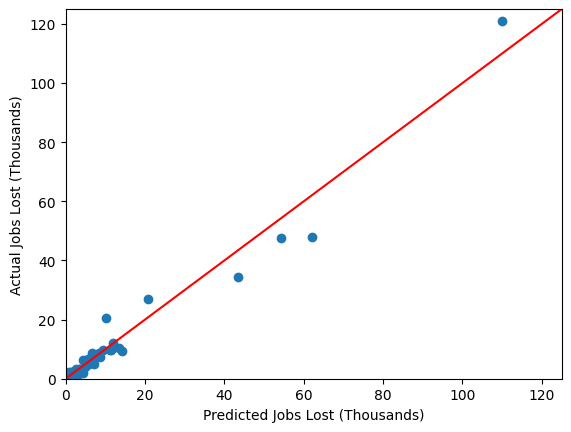

In [278]:
fig, ax = plt.subplots()
ax.scatter(y_pred/1000, y4/1000)
ax.set_xlabel('Predicted Jobs Lost (Thousands)')
ax.set_ylabel('Actual Jobs Lost (Thousands)')
ax.set_xlim(0, 125)
ax.set_ylim(0, 125)
ax.axline((0, 0), slope=1, color = 'red')

In [262]:
type(y4_array)

numpy.ndarray

In [247]:
desired_rows = merged_df[merged_df[10]]
desired_rows

KeyError: 10

In [248]:
# Predict on the entire dataset
y_pred10 = model_lassocheck2.predict(x4)

# Reshape y4 for concatenation
y4_array = y4.values.reshape(-1, 1)

# Concatenate X4 and y4 into a dataframe
comparison_df = pd.concat([x4, y4_array], axis=1)

# Add the predicted values to the dataframe
comparison_df['predicted'] = y_pred10

# Merge the comparison dataframe with the original take3 dataframe
merged_df = pd.merge(take3, comparison_df, left_index=True, right_index=True, suffixes=('_orig', '_pred'))

# Display the merged dataframe with all the columns
print(merged_df.head(10))

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

This does perform very well but we can't use both because pop and establishments are too collinear

# Random Forest Regression

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, make_scorer
from sklearn.pipeline import make_pipeline

In [64]:
# Split the data into features (X) and target (y)
y4 = counts_only['Job_Loss_Ratio']
X4 = counts_only.iloc[:, 1:-1]

# Split the data into training and test sets
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2)

In [65]:
mod = RandomForestRegressor(n_estimators = 100)

In [66]:
forest_model = make_pipeline(mod)
print(forest_model)

Pipeline(steps=[('randomforestregressor', RandomForestRegressor())])


In [67]:
kfold = KFold(n_splits = 5)
forest_model.fit(X4_train, y4_train)

Pipeline(steps=[('randomforestregressor', RandomForestRegressor())])

In [68]:
score = cross_val_score(forest_model, X4, y4, cv=kfold)
print(score)

[0.20886122 0.18964641 0.15389812 0.13834512 0.48108255]


In [70]:
yp = forest_model.predict(X4_test)
print(r2_score(y4_test, yp), 'Rsquare')
print(mean_squared_error(y4_test,yp), 'MSE')
#print(mean_squared_log_error(y4_test,yp), 'MSLE')

0.036384595321744206 Rsquare
0.0034428757533724705 MSE


In [71]:
print(f'MAPE score of the model on the test set: {mean_absolute_percentage_error(y4_test, yp)}')

MAPE score of the model on the test set: 19.85273715234767


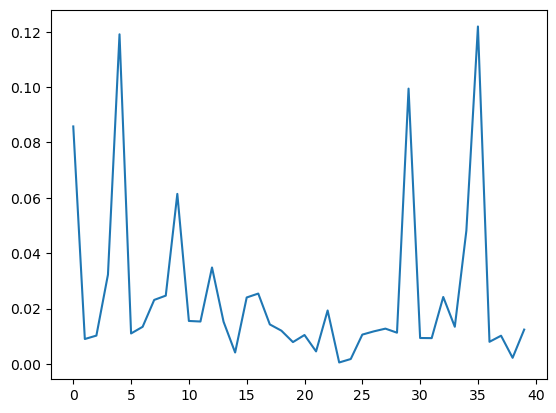

In [72]:
#feature importance
features = X4_test
importances = mod.feature_importances_
cols = list(X4_train.columns.values)
plt.figure
plt.plot(importances)

In [73]:
mod.feature_importances_

array([0.08578147, 0.00899536, 0.01022949, 0.03224803, 0.11906344,
       0.01100118, 0.01340755, 0.0231169 , 0.0246637 , 0.0614182 ,
       0.01551642, 0.01531726, 0.03483566, 0.01522542, 0.0041259 ,
       0.02399843, 0.02541219, 0.01427268, 0.01201148, 0.00788503,
       0.01044243, 0.00452048, 0.01930459, 0.0005201 , 0.00177154,
       0.01058774, 0.01176509, 0.01274376, 0.01127835, 0.09944581,
       0.00936144, 0.00931575, 0.02417859, 0.01342303, 0.04814093,
       0.12189031, 0.00799115, 0.01018841, 0.00220487, 0.01239984])

In [74]:
importances = pd.Series(mod.feature_importances_, index=X4_train.columns)
importances_sorted = importances.sort_values(ascending=False)

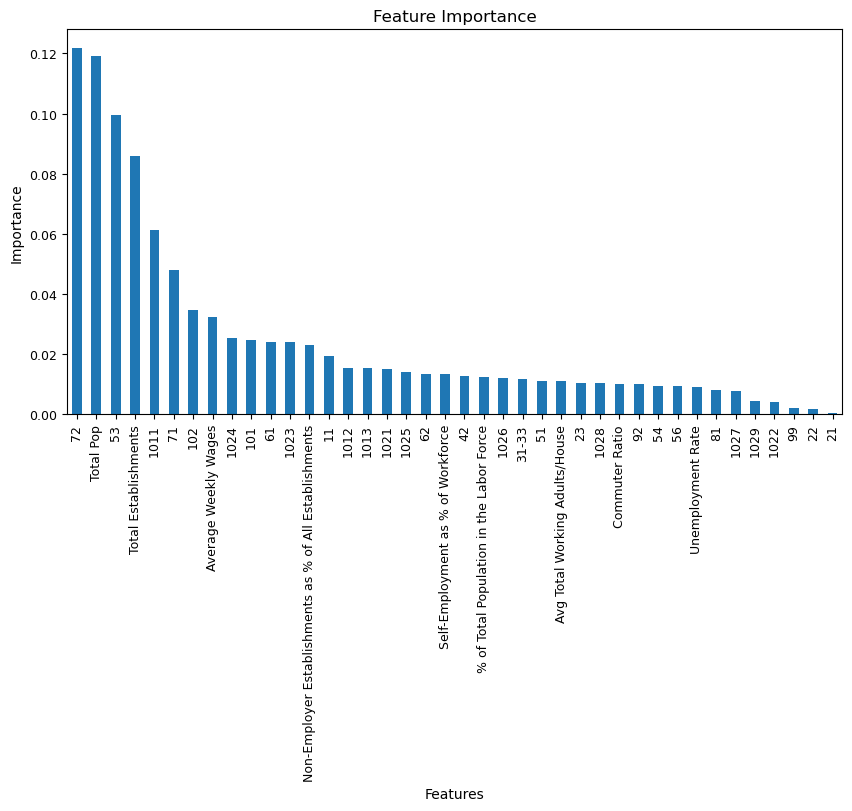

In [75]:
plt.figure(figsize = (10,5))
importances_sorted.plot(kind='bar', width = 0.5, fontsize=9)
plt.title('Feature Importance')
plt.xlabel('Features', fontsize = 10)
plt.ylabel('Importance', fontsize = 10)
plt.show()

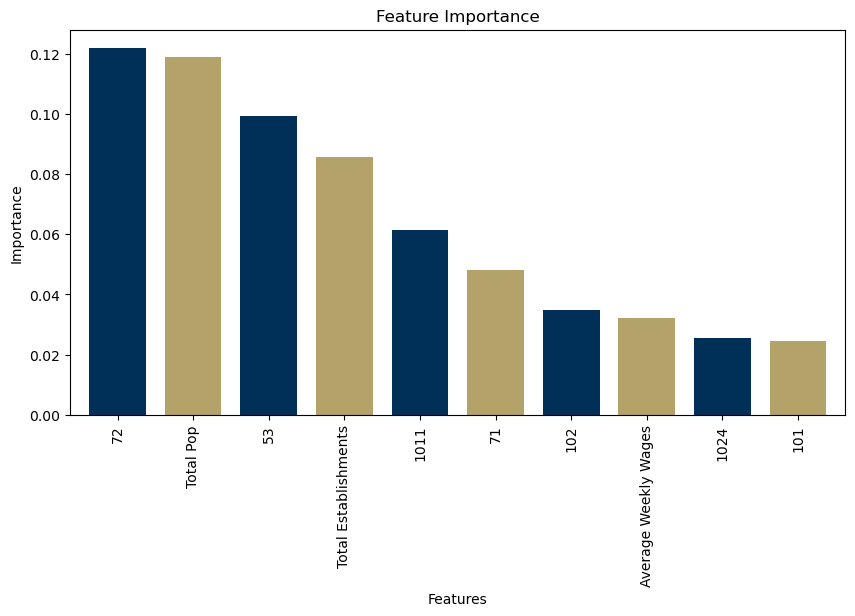

In [76]:
importances_sorted_top_10 = importances.sort_values(ascending=False)[:10]

plt.figure(figsize = (10,5))
importances_sorted_top_10.plot(kind='bar', width = 0.75, fontsize=10, color =(['#003057', '#B3A369', '#003057', '#B3A369', '#003057', '#B3A369', '#003057', '#B3A369', '#003057', '#B3A369', '#003057', '#B3A369']))
plt.title('Feature Importance')
plt.xlabel('Features', fontsize = 10)
plt.ylabel('Importance', fontsize = 10)
plt.show()

# XGBoost

In [77]:
import xgboost as xgb
from pyspark.ml.evaluation import RegressionEvaluator

In [78]:
# Split the data into features (X) and target (y)
y5 = counts_only['Job_Loss_Ratio']
X5 = counts_only.iloc[:, 1:-1]

# Split the data into training and test sets
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2)

In [79]:
dtrain_reg = xgb.DMatrix(X5_train, y5_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X5_test, y5_test, enable_categorical = True)

In [80]:
params = {"objective": "reg:squarederror", "tree_method": "hist"}

In [81]:
n = 100

model = xgb.train(params=params, dtrain=dtrain_reg, num_boost_round = n)

In [82]:
pred = model.predict(dtest_reg)

In [83]:
rmse = mean_squared_error(y5_test, pred, squared=False)
print(f"RMSE of base model: {rmse:.3f}")

RMSE of base model: 0.051


In [84]:
from sklearn.metrics import r2_score

# Calculate r2 score for the test set
r2 = r2_score(y5_test, pred)

print("r2 score:", r2)

r2 score: 0.05577322351538416
